# 4. Estimation and Causal Inference

## 1. Write out a simple econometric model regressing mortality on temperature.

Before we regress mortality on temperature, we need to ensure our observations fit the assumptions required for linear regression:
- **Linear relationship**: if a place is too cold, then the mortality is probably high as well, so we might expect a U shaped relationship instead of a purely linear one. However, given that we are conditioning on a country that is almost always warm, that might not be a problem.

- **Multivariate normality**

In [14]:
import pandas as pd
import pylab
import scipy.stats as stats
import numpy as np

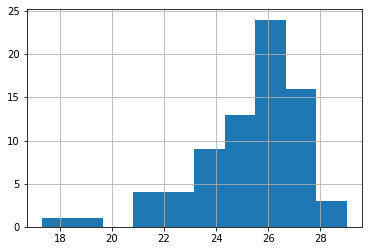

In [15]:
df = pd.read_csv('./data/DailyAverages/districtDailyAverage_2011.csv').groupby('unique_dist_id').mean()
df['weightedAverageTemperature'].hist()

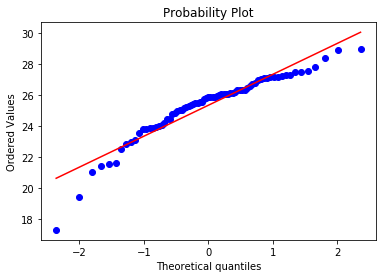

In [16]:
stats.probplot(df['weightedAverageTemperature'], dist='norm', plot=pylab)
pylab.show()

Overall, our observations appear multivariate normal, so this assumption is satisfied.

- **No or little multicollinearity**: since there is a single independent variable, we don't have to worry about multicollinearity.

- **No auto-correlation**: since we are using the yearly average data across independent regions, there is no auto-correlation.

- **Homoscedasticity**: in order to check for homoskedasticity, we can look at the residuals on the QQ plot. The residuals don't look terrible for the most part. 

Seeing that we've met the assumptions for performing linear regression, we can continue. If we regress mortality on temperature (assuming mortality is measured in deaths per 1000 per year), we would use simple linear regression:
$$
y_i = \hat \beta_1 x_i + \beta_0,
$$
where $y$ is the mortality, $m$ is the coefficient (change in mortality per change in unit temperature), $x$ is the temperature, and $b$ is the baseline intercept. A few considerations we'd want to make:
- what are the confounding variables?
 - if it's cheaper to be poor in warmer places (like in the United States), and given that poor people can't afford good healthcare, you would expect people with worse healthcare to be in warmer areas. Thus wealth could be a confounding variable, and muddles a causal relationship between temperature and mortality.

## 2. Suppose you estimate the model using OLS and obtain a coefficient of 0.05 with a standard error of 0.02. Interpret this result.

Suppose we used Ordinary Least Squares to estimate the model and obtained 
$$
\hat \beta = .05, \text{se} = .02
$$

This could be interpreted as, "for every one degree increase in average annual temperature, there is a .05 increase in deaths per thousand people per year." The standard error of the coefficient being .02 can be interpreted as a 95% confidence interval for the true parameter, which is between .01 and .09. The relationship is thus positive with a significance level at 5%. The t-statistic is .05 / .02 = 2.5, so our regression coefficient is 2.5 standard deviations from the null hypothesis that there is no relationship between temperature and mortality.

## 3. The effect of temperature on mortality is very likely nonlinear. How would you modify your model above to estimate any potential nonlinearities?

If we wanted to rectify potential nonlinearites, we could try LOESS is a simple generalization of linear regression, and is similar to the method we used to calculate district statustics: weighting nearby points to do regress on each datapoint. This would lower the bias of our model, but could increase the variance, since we may be overfitting.

## 4. Is your parameter of interest identified? How could you use a)fixed effects and b) other control variables to remove potentially confounding factors? 

The parameter of interest here is $\beta$, the effect of temperature on mortality. To use a fixed effects model, we would introduce a fixed variable for each state, since the state each data point was taken in doesn't change over time. 

Rainfall could be a confounding variable, as the relationship between rain and temperature is likely second-order, and the relationship between rainfall and mortality is probably causal. In addition, since rainfall and temperature are related, we might want to introduce an interaction between rainfall and temperature. Finally, we could add a variable for the year, although due to global warming the year increasing may correlate highly with temperature, so we should probably experiment with a year/no-year model.

## 5. Write out a full econometric model addressing the concerns raised in 3 and 4. How should the standard errors from this specification be estimated?

A full econometric model addressing the concerns raised in 3 and 4 could be the following:
$$
m = t + r + rt + s + y,
$$

where $m$ is the mortality, $t$ is the temperature, $r$ is the rainfall, $s$ is the state fixed effect, and $y$ is the year fixed effect. Standard implementations of LOESS also calculate the standard error for each parameter.